<a href="https://colab.research.google.com/github/annvorosh/GB/blob/Alg_AD/Alg_AD_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Урок 3. Классификация. Логистическая регрессия. ПРАКТИЧЕСКОЕ ЗАДАНИЕ.

#### 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [ ]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [ ]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [ ]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [ ]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [ ]:
def calc_logloss(y, y_pred):
    y_min = 0.00001 
    y_max = 1 - y_min
    y_pred = np.clip(y_pred, y_min, y_max) 
# Функция clip() ограниченичивает элементы массива указанным интервалом допустимых значений. 
# Например, если указать интервал [5, 10], то все значения в массиве, которые меньше 5 примут значение равное 5, 
# а все значения больше 10, будут равны 10. Если указано значение None, то обрезка по значению интервала не выполняется.
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [ ]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [ ]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [ ]:
z = np.linspace(-10, 10, 101)

In [ ]:
probabilities = sigmoid(z)

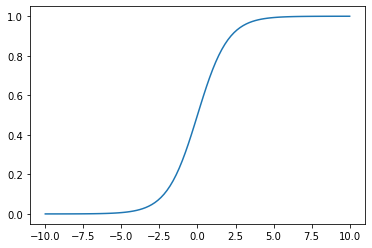

In [ ]:
plt.plot(z, probabilities)
plt.show()

In [ ]:
# Logistic Regression

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W
eval_model(X_st, y, iterations=100000, alpha=1e-5)

100000 [ 0.30086451 -0.7000869   0.66303662  1.28881564] 0.5201517015500403


array([ 0.30086451, -0.7000869 ,  0.66303662,  1.28881564])

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [ ]:
def eval_model(X, y, iterations, alpha, tolerance):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    logloss = []
    weights = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T))
        weights.append(W)
        logloss.append(err)
        
        if i > 2:
            if np.abs(logloss[i-1] - logloss[i-2]) < tolerance:
                break
    
    return logloss, weights


In [ ]:
def plot_err(logloss, weights):

    fig= plt.figure(figsize=(16,5))
    plt.suptitle(f'Alpha: {alpha},  Number of iterations: {len(logloss)}, Log loss: {round(logloss[-1], 4)}')

    plt.subplot(1, 2, 2)
    plt.title('Log loss')
    plt.plot(range(len(logloss)), logloss)
    plt.grid()
    plt.xlabel('iterations')
    plt.ylabel('loss')


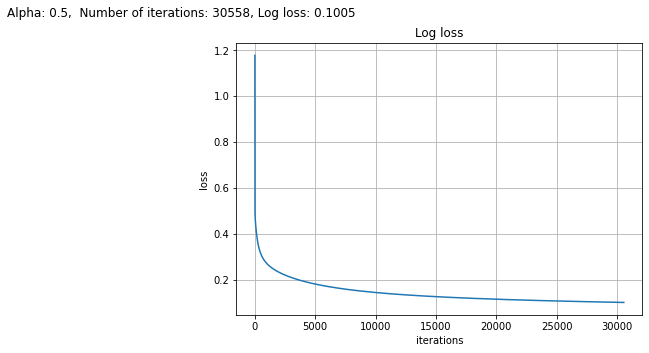

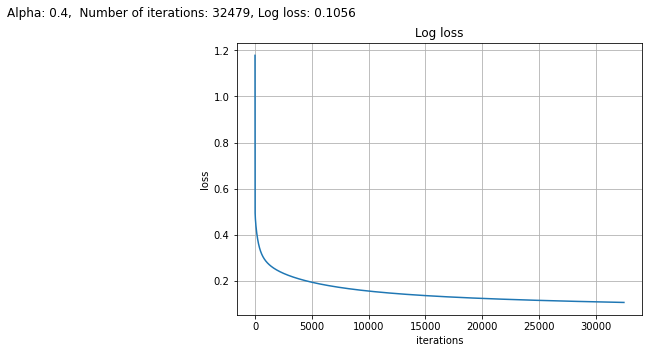

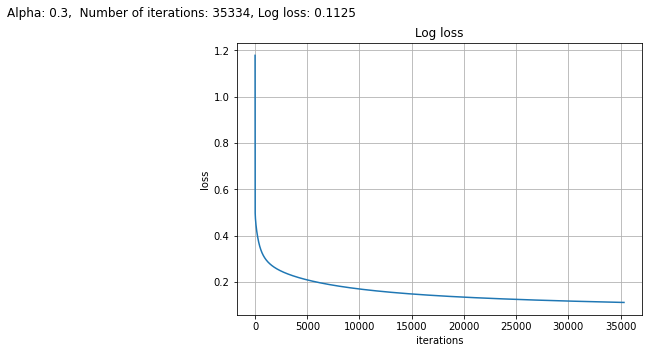

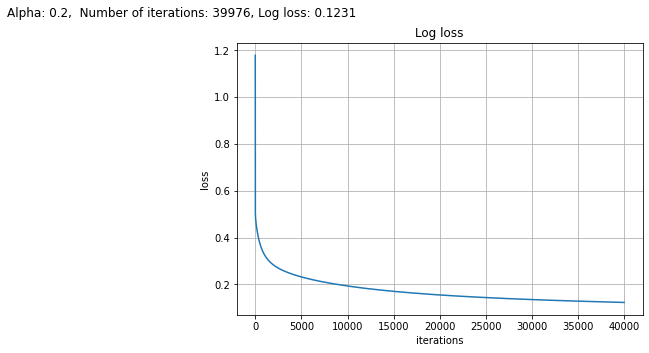

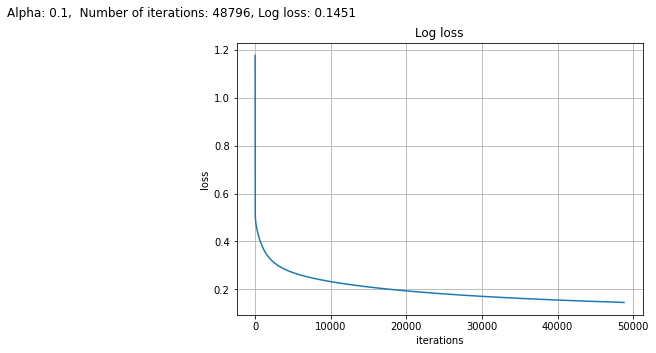

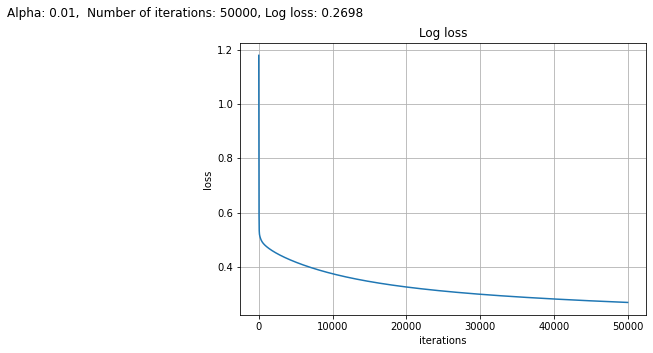

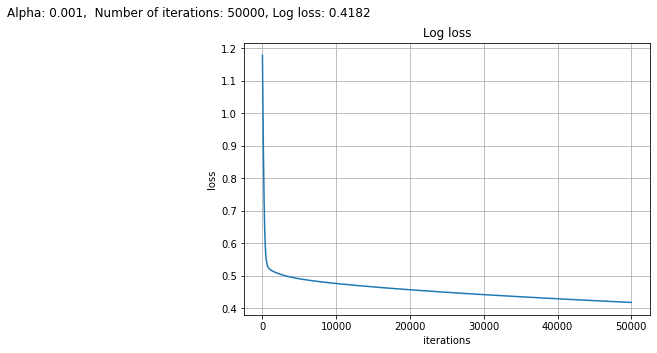

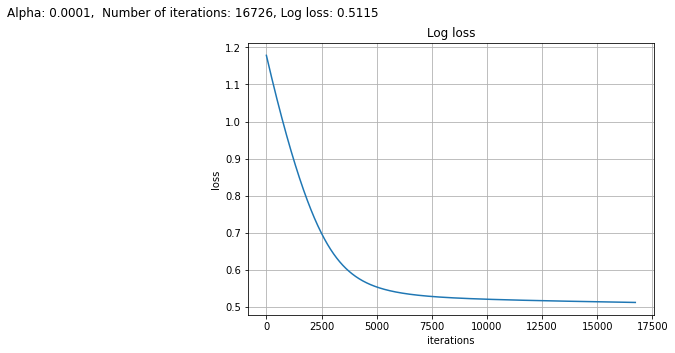

In [ ]:
for alpha in [0.5, 0.4, 0.3, 0.2, 0.1, 1e-2, 1e-3, 1e-4]:
    W = eval_model(X_st, y, iterations=50000, alpha=alpha, tolerance = 1e-6)
    plot_err(W[0], W[1])

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

In [ ]:
def calc_pred_proba(W, X):
    z = np.dot(W,X)
    p = 1/(1 + np.exp(-z)) # вероятность отнесения объекта к классу 1
    return p

W = eval_model(X_st, y, iterations=50000, alpha=0.5, tolerance = 1e-6)
y_pred_proba = calc_pred_proba(W[1][-1], X_st)
y_pred_proba

array([3.63833160e-01, 6.40491275e-03, 1.00000000e+00, 7.03551372e-09,
       9.54761209e-01, 3.57665989e-02, 1.00000000e+00, 1.29362772e-02,
       6.37056069e-01, 9.99999964e-01])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

In [ ]:
def calc_pred(W, X, treshold = 0.5):
    y_pred = calc_pred_proba(W, X)
    y_pred = np.where(y_pred > treshold, 1, 0 )
    return y_pred
y_pred = calc_pred(W[1][-1], X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [ ]:
import sklearn.metrics

accuracy = sklearn.metrics.accuracy_score(y, y_pred)

conf_matrix = sklearn.metrics.confusion_matrix(y, y_pred) # матрица ошибок

precision = sklearn.metrics.precision_score(y, y_pred, pos_label=1)

recall = sklearn.metrics.recall_score(y, y_pred, pos_label=1)

f1_score = 2 * precision * recall / (precision + recall)

print(f'accuracy = {accuracy} \nconfusion_matrix: \n{conf_matrix} \nprecision = {precision}  \nrecall = {recall} \nf1_score = {f1_score}')

accuracy = 1.0 
confusion_matrix: 
[[5 0]
 [0 5]] 
precision = 1.0  
recall = 1.0 
f1_score = 1.0


### 6. Могла ли модель переобучиться? Почему?


Модель могла переобучитья при недостаточном количестве данных. Так как для выбора настраиваемых параметров мы будем основываться на неполную картину данных.

## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?